# Fuzzy-set-aryhtetics review
This document shows review of fuzzy-set-arythmetic package.
In this approach every fuzzyset is represented by alphacuts.
Let's examine Alphacut object. 

In [2]:
from fuzzy_set_arythmetic.alpha_cut import AlphaCut
from decimal import Decimal
from fractions import Fraction

ac0 = AlphaCut(level = 0.1, left_borders = 1, right_borders = 10)
ac1 = AlphaCut(level = Decimal(0.2), left_borders = [3, 5], right_borders = [4, 6])
ac2 = AlphaCut(level = Fraction(3,10), left_borders = (3, 5), right_borders = (4, 6))

* Alphacut object describes alphacut and has three arguments:   
level - represents membership level. Level has to be between 0 and 1. It can be float, Decimal or Fraction.  
left_borders - represents set (or one) left borders of alphacut.  
right_borders - represents set (or one) right borders of alphacut.  
If there is more than one value of left and right borders fuzzyset is nonconvex.   
To make operations on alphacuts it has to have the same types of arguments accordingly.   
That means you can`t add nor combine into fuzzyset ac0 and ac1 because level of ac0 is float and level of ac1 is Decimal. It raises an error.  
Now lets look on FuzzySet object:

In [3]:
from fuzzy_set_arythmetic.fuzzy_set import FuzzySet
ac1 = AlphaCut(level = 0.6, left_borders = 3, right_borders = 7)
ac2 = AlphaCut(level = 1.0, left_borders = 5, right_borders = 6)
fs0 = FuzzySet(alpha_cuts = [ac0, ac1, ac2])

* Fuzzyset object describes fuzzyset and has one argument:  
alpha_cuts - iterable of Alphacut or one Alphacut object.  
To vizualize fuzzyset you need to use FuzzyPlot object:

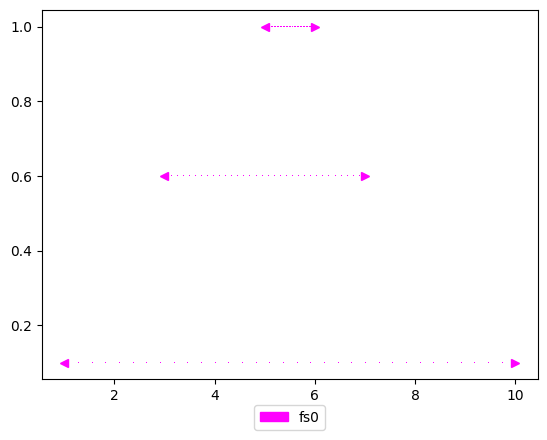

In [4]:
from fuzzy_set_arythmetic.plot import FuzzyPlot, FuzzyPlotDef 
fpd0 = FuzzyPlotDef(fuzzy_set = fs0, label = 'fs0', color = 'magenta')
fp0 = FuzzyPlot(fpd = fpd0)
fp0.plot()

* FuzzyPlot object has one argument:  
  fpd - FuzzySetDef, which is fuzzyset object with label and color to plot.  
  There is one fuzzyset (fs0) which is a combination of three alphacuts (ac0, ac1, ac2) on the picture.
  If you want to save picture you need to use optional argument filepath in plot method.  
  You can add another fuzzyset to plot by:

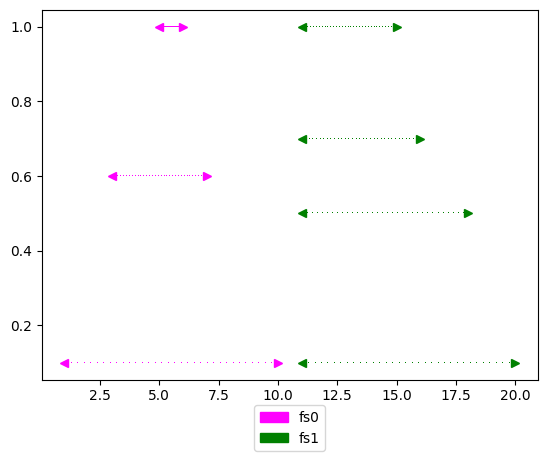

In [5]:
ac3 = AlphaCut(level = 0.1, left_borders = 11, right_borders = 20)
ac4 = AlphaCut(level = 0.5, left_borders = 11, right_borders = 18)
ac5 = AlphaCut(level = 0.7, left_borders = 11, right_borders = 16)
ac6 = AlphaCut(level = 1.0, left_borders = 11, right_borders = 15)
fs1 = FuzzySet([ac3, ac4, ac5, ac6])
fpd1 = FuzzyPlotDef(fuzzy_set = fs1, label = 'fs1', color = 'green')
fp0.add_to_plotlist(fpd1).plot()


* There are two fuzzysets on one picture.  
  Now let's look on add fuzzysets with T-norm Min:

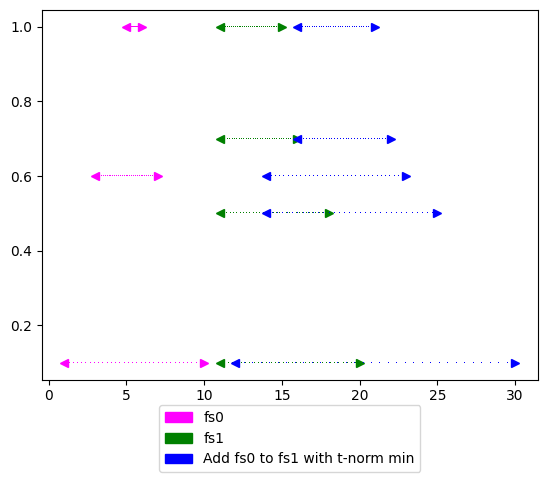

In [6]:
from fuzzy_set_arythmetic.t_norm import Min
fs_ret = fs0.add_with_tnorm(fs1, Min)
fpd_ret = FuzzyPlotDef(fs_ret, 'Add fs0 to fs1 with t-norm min', 'blue')
fp0.add_to_plotlist(fpd_ret)
fp0.plot()

* Subtract operation is made similar way.
* Fuzzy-set-arythmrtic package contins T-norms: Min, Max, Product, Lukasiewicz, Drastic, NilpotentHamacher and Sklar.

* FuzzySet can be obtained from function given as list of points y, or x, y.

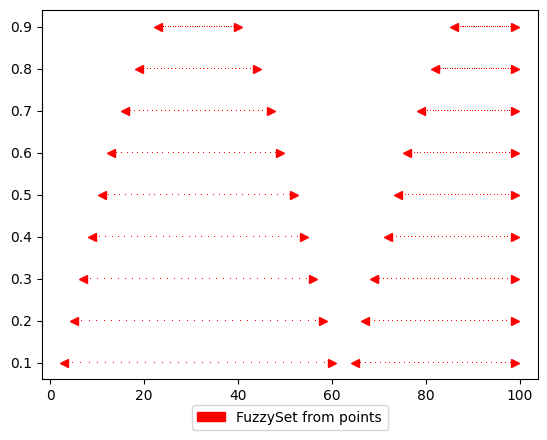

In [11]:
from math import sin
points = [(int(i), abs(sin(i/20))) for i in range(100)]
fs2 = FuzzySet.from_points(alpha_levels= (0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9), points = points)
fpd2 = FuzzyPlotDef(fs2, 'FuzzySet from points', 'red')
fp1 = FuzzyPlot(fpd2)
fp1.plot()